# Импорт библиотек и звгрузка данных

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 26 kB/s 


In [3]:
import pandas as pd
# from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ТЗ_МайнСет/Задачи Разработчик/Задача 1/Прогнозирование пролонгации/Данные для задачи.txt', delimiter=';')

# Анализ данных

In [5]:
data.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,F,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,M,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,F,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,M,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,F,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [6]:
# смотрим на пропуски
data.isna().sum()

DATA_TYPE                        0
POLICY_ID                        0
POLICY_BEGIN_MONTH               0
POLICY_END_MONTH                 0
POLICY_IS_RENEWED                0
POLICY_SALES_CHANNEL             0
POLICY_SALES_CHANNEL_GROUP       0
POLICY_BRANCH                    0
POLICY_MIN_AGE                   0
POLICY_MIN_DRIVING_EXPERIENCE    0
VEHICLE_MAKE                     0
VEHICLE_MODEL                    0
VEHICLE_ENGINE_POWER             0
VEHICLE_IN_CREDIT                0
VEHICLE_SUM_INSURED              0
POLICY_INTERMEDIARY              0
INSURER_GENDER                   0
POLICY_CLM_N                     0
POLICY_CLM_GLT_N                 0
POLICY_PRV_CLM_N                 0
POLICY_PRV_CLM_GLT_N             0
CLIENT_HAS_DAGO                  0
CLIENT_HAS_OSAGO                 0
POLICY_COURT_SIGN                0
CLAIM_AVG_ACC_ST_PRD             0
POLICY_HAS_COMPLAINTS            0
POLICY_YEARS_RENEWED_N           0
POLICY_DEDUCT_VALUE              0
CLIENT_REGISTRATION_

In [7]:
# смотрим на типы признков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATA_TYPE                      96605 non-null  object 
 1   POLICY_ID                      96605 non-null  int64  
 2   POLICY_BEGIN_MONTH             96605 non-null  int64  
 3   POLICY_END_MONTH               96605 non-null  int64  
 4   POLICY_IS_RENEWED              96605 non-null  int64  
 5   POLICY_SALES_CHANNEL           96605 non-null  int64  
 6   POLICY_SALES_CHANNEL_GROUP     96605 non-null  int64  
 7   POLICY_BRANCH                  96605 non-null  object 
 8   POLICY_MIN_AGE                 96605 non-null  int64  
 9   POLICY_MIN_DRIVING_EXPERIENCE  96605 non-null  int64  
 10  VEHICLE_MAKE                   96605 non-null  object 
 11  VEHICLE_MODEL                  96605 non-null  object 
 12  VEHICLE_ENGINE_POWER           96605 non-null 

In [8]:
data.DATA_TYPE.value_counts()

TRAIN    77407
TEST     19198
Name: DATA_TYPE, dtype: int64

# Обработка признаков

In [9]:
data.drop('POLICY_ID', axis=1, inplace=True) # удалим столбец
columns_all = data.columns
for col in columns_all:
  print(f'Название колонки {col}')
  print(data[col].value_counts())
  print('------------------------------------')

Название колонки DATA_TYPE
TRAIN    77407
TEST     19198
Name: DATA_TYPE, dtype: int64
------------------------------------
Название колонки POLICY_BEGIN_MONTH
8     14426
12    10475
4      9736
3      9282
10     8100
11     8048
9      6888
2      6525
5      6201
7      6141
6      5700
1      5083
Name: POLICY_BEGIN_MONTH, dtype: int64
------------------------------------
Название колонки POLICY_END_MONTH
8     14394
12    10289
4      9497
3      9302
10     8125
11     7984
9      6991
2      6564
5      6287
7      6148
6      5717
1      5307
Name: POLICY_END_MONTH, dtype: int64
------------------------------------
Название колонки POLICY_IS_RENEWED
1    48376
0    48229
Name: POLICY_IS_RENEWED, dtype: int64
------------------------------------
Название колонки POLICY_SALES_CHANNEL
52    24728
53    21070
50    16176
55    11397
54     4897
      ...  
61       15
30       14
58        7
38        2
56        1
Name: POLICY_SALES_CHANNEL, Length: 63, dtype: int64
-------------

In [ ]:
one_hot = [POLICY_BEGIN_MONTH, POLICY_SALES_CHANNEL, POLICY_SALES_CHANNEL_GROUP, POLICY_MIN_AGE

In [8]:
data.POLICY_MIN_DRIVING_EXPERIENCE.value_counts()

14      5262
15      5153
13      4751
10      4627
12      4425
        ... 
1969       1
1962       1
1965       1
1963       1
1958       1
Name: POLICY_MIN_DRIVING_EXPERIENCE, Length: 112, dtype: int64


In [ ]:
data.DATA_TYPE.value_counts(normalize=True)

TRAIN    0.801273
TEST     0.198727
Name: DATA_TYPE, dtype: float64

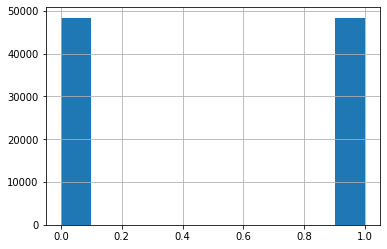

In [ ]:
# Смотрим на баланс целевой переменной POLICY_IS_RENEWED
data.POLICY_IS_RENEWED.hist()

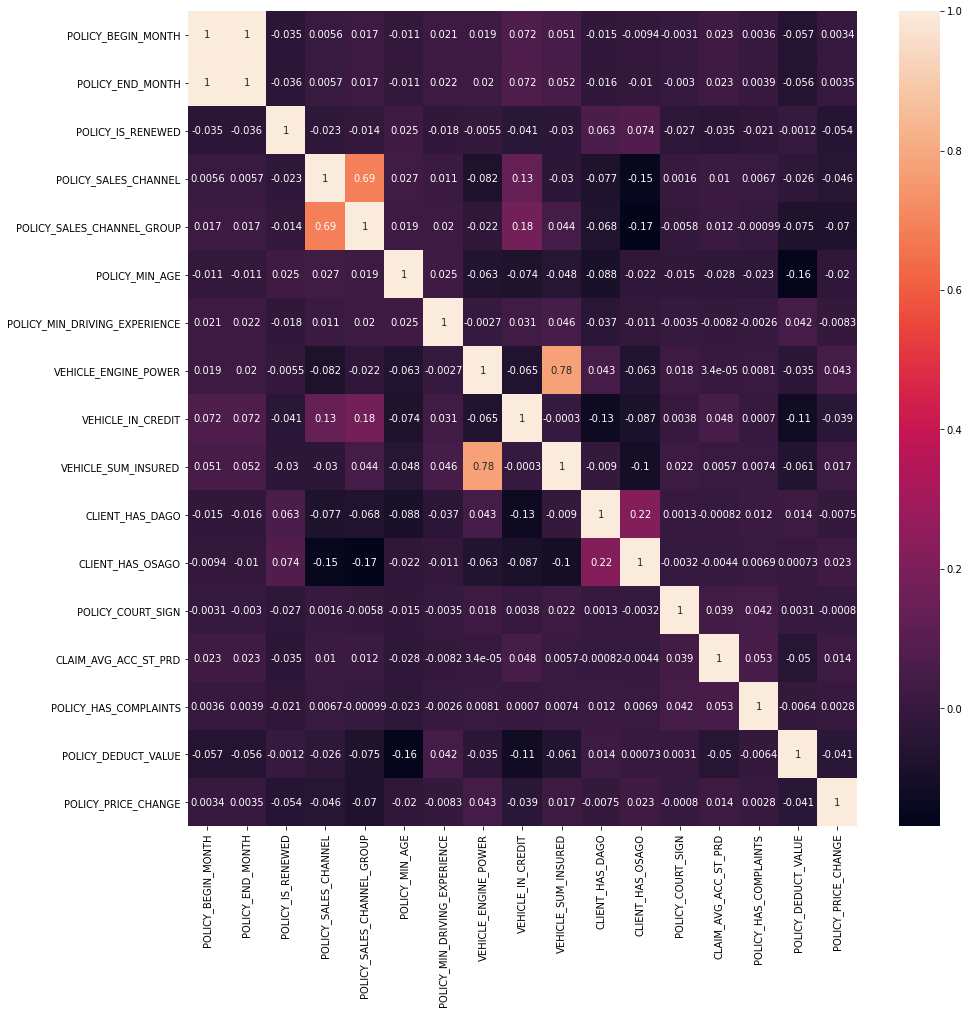

In [ ]:
# Построим на кореляцию 
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

POLICY_END_MONTH - сильно корелирует - удалим его.


In [1]:
data.drop('POLICY_END_MONTH', axis=1, inplace=True)

NameError: ignored

# Preprocessing

In [ ]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
len(num_cols)

16

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns
len(cat_cols)
cat_cols = cat_cols.drop('DATA_TYPE')

In [ ]:
target = 'POLICY_IS_RENEWED'

In [ ]:
train = data[data.DATA_TYPE == 'TRAIN']
train.drop('DATA_TYPE', axis=1, inplace=True)
test = data[data.DATA_TYPE == 'TEST ']
test.drop('DATA_TYPE', axis=1, inplace=True)

In [ ]:
X = train.drop(target, axis=1)
y = train[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# catboost roc_auc 0.6702229461600444


In [ ]:
model = CatBoostClassifier(eval_metric='AUC')
model.fit(X_train, y_train, cat_features=cat_cols.values)

Learning rate set to 0.056663
0:	total: 118ms	remaining: 1m 57s
1:	total: 229ms	remaining: 1m 54s
2:	total: 333ms	remaining: 1m 50s
3:	total: 439ms	remaining: 1m 49s
4:	total: 550ms	remaining: 1m 49s
5:	total: 674ms	remaining: 1m 51s
6:	total: 772ms	remaining: 1m 49s
7:	total: 883ms	remaining: 1m 49s
8:	total: 991ms	remaining: 1m 49s
9:	total: 1.11s	remaining: 1m 50s
10:	total: 1.22s	remaining: 1m 50s
11:	total: 1.33s	remaining: 1m 49s
12:	total: 1.45s	remaining: 1m 49s
13:	total: 1.57s	remaining: 1m 50s
14:	total: 1.69s	remaining: 1m 51s
15:	total: 1.82s	remaining: 1m 51s
16:	total: 1.93s	remaining: 1m 51s
17:	total: 2.05s	remaining: 1m 51s
18:	total: 2.15s	remaining: 1m 51s
19:	total: 2.27s	remaining: 1m 50s
20:	total: 2.36s	remaining: 1m 50s
21:	total: 2.46s	remaining: 1m 49s
22:	total: 2.58s	remaining: 1m 49s
23:	total: 2.71s	remaining: 1m 50s
24:	total: 2.82s	remaining: 1m 49s
25:	total: 2.94s	remaining: 1m 50s
26:	total: 3.05s	remaining: 1m 50s
27:	total: 3.17s	remaining: 1m 50s


In [ ]:
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6702229461600444

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 3949,  4831],
       [ 1579, 12864]])

In [ ]:
# model = CatBoostClassifier(cat_features=cat_cols.values)
# grid = {'n_estimators' : [100, 200, 500, 1000],
#         'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10]}

# grid_search_result = model.grid_search(grid, 
#                                        X_train, 
#                                        y_train, 
#                                        plot=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
646:	learn: 0.4970851	test: 0.5613147	best: 0.5608161 (447)	total: 1m 16s	remaining: 41.9s
647:	learn: 0.4970392	test: 0.5613128	best: 0.5608161 (447)	total: 1m 16s	remaining: 41.7s
648:	learn: 0.4969627	test: 0.5613121	best: 0.5608161 (447)	total: 1m 16s	remaining: 41.6s
649:	learn: 0.4969454	test: 0.5613162	best: 0.5608161 (447)	total: 1m 17s	remaining: 41.5s
650:	learn: 0.4968858	test: 0.5613289	best: 0.5608161 (447)	total: 1m 17s	remaining: 41.4s
651:	learn: 0.4968187	test: 0.5613365	best: 0.5608161 (447)	total: 1m 17s	remaining: 41.3s
652:	learn: 0.4967701	test: 0.5613414	best: 0.5608161 (447)	total: 1m 17s	remaining: 41.1s
653:	learn: 0.4967239	test: 0.5613422	best: 0.5608161 (447)	total: 1m 17s	remaining: 41s
654:	learn: 0.4966731	test: 0.5613874	best: 0.5608161 (447)	total: 1m 17s	remaining: 40.9s
655:	learn: 0.4966038	test: 0.5613841	best: 0.5608161 (447)	total: 1m 17s	remaining: 40.8s
656:	learn: 0.4965366	te

In [ ]:
# grid_search_result['params'] # {'depth': 10, 'iterations': 1000, 'learning_rate': 0.03}

{'depth': 10, 'iterations': 1000, 'learning_rate': 0.03}

In [ ]:
model = CatBoostClassifier(eval_metric='AUC', depth=10, iterations=1000, learning_rate=0.03)
model.fit(X_train, y_train, cat_features=cat_cols.values)

0:	total: 279ms	remaining: 4m 39s
1:	total: 586ms	remaining: 4m 52s
2:	total: 862ms	remaining: 4m 46s
3:	total: 1.13s	remaining: 4m 42s
4:	total: 1.43s	remaining: 4m 44s
5:	total: 1.74s	remaining: 4m 48s
6:	total: 2.07s	remaining: 4m 53s
7:	total: 2.37s	remaining: 4m 53s
8:	total: 2.69s	remaining: 4m 56s
9:	total: 3.02s	remaining: 4m 58s
10:	total: 3.15s	remaining: 4m 42s
11:	total: 3.45s	remaining: 4m 44s
12:	total: 3.78s	remaining: 4m 46s
13:	total: 4.07s	remaining: 4m 46s
14:	total: 4.39s	remaining: 4m 48s
15:	total: 4.67s	remaining: 4m 47s
16:	total: 4.95s	remaining: 4m 46s
17:	total: 5.27s	remaining: 4m 47s
18:	total: 5.57s	remaining: 4m 47s
19:	total: 5.78s	remaining: 4m 43s
20:	total: 6.07s	remaining: 4m 42s
21:	total: 6.36s	remaining: 4m 42s
22:	total: 6.68s	remaining: 4m 43s
23:	total: 7s	remaining: 4m 44s
24:	total: 7.29s	remaining: 4m 44s
25:	total: 7.48s	remaining: 4m 40s
26:	total: 7.78s	remaining: 4m 40s
27:	total: 8.09s	remaining: 4m 40s
28:	total: 8.42s	remaining: 4m 41

In [ ]:
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6709888782815552

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 3974,  4806],
       [ 1598, 12845]])